# Import statements

In [1]:
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np


import seaborn as sns

# Reading and printing data

In [2]:
data = pd.read_csv('patient_dataset.csv')

In [3]:
data.head(10)

,Name,Gender,Age,Weight (kg),Height (cm),BMI,Enrolled in Diet Plan,Diet Type,Activity Level,Creatine
0,Aarav,Male,25,63.571215,155.581517,26.3,1,Vegetarian,High,1.94
1,Ananya,Female,17,58.279333,159.306436,23.0,1,Non-Vegetarian,High,0.65
2,Neha,Female,31,75.624299,182.377218,22.7,1,Non-Vegetarian,High,5.22
3,Kavya,Female,25,60.441782,188.288523,17.0,0,Vegetarian,Low,1.05
4,Priya,Female,28,84.662303,174.149041,27.9,1,Keto,High,2.66
5,Siddharth,Male,19,74.321422,183.176187,22.2,0,Non-Vegetarian,High,0.83
6,Aarav,Male,24,82.057392,189.408861,22.9,1,Vegetarian,Moderate,1.51
7,Simran,Female,28,60.692893,164.210828,22.5,0,Vegetarian,High,1.18
8,Harsh,Male,24,60.719087,165.178218,22.3,1,Vegan,Low,3.03
9,Aarav,Male,27,69.040768,152.647544,29.6,0,Non-Vegetarian,High,1.71


In [5]:
data = data.drop(['Name' , 'Gender' , 'Age' , 'Enrolled in Diet Plan' , 'Diet Type' , 'Activity Level'] , axis = 1)

In [6]:
# check missing vlaues
data.any().isna().sum()

0

In [7]:
data.head()

,Weight (kg),Height (cm),BMI,Creatine
0,63.571215,155.581517,26.3,1.94
1,58.279333,159.306436,23.0,0.65
2,75.624299,182.377218,22.7,5.22
3,60.441782,188.288523,17.0,1.05
4,84.662303,174.149041,27.9,2.66


# Fit model and evaluate

In [12]:
num_clusters = [i for i in range(2, 7)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [9]:
X_scaled = StandardScaler().fit_transform(data)

In [13]:
inertia = kmeans_inertia(num_clusters,X_scaled)
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[281.16577130930904,
 223.73391509799805,
 173.42892365312363,
 136.56047655311033,
 119.57360209595396]

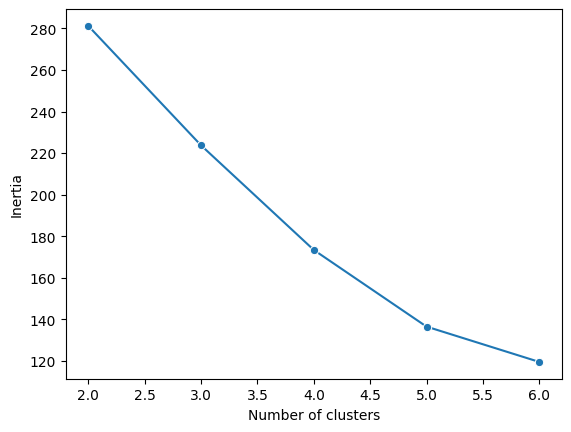

In [14]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [18]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_scaled)

data['cluster'] = kmeans3.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
def give_label(cluster_num):
  if cluster_num == 0:
    return 'Weak'
  elif cluster_num == 1:
    return 'Normal'
  else:
    return 'Healthy'

data['Class'] = data['cluster'].apply(give_label)

In [25]:
data.head(10)

,Weight (kg),Height (cm),BMI,Creatine,cluster,Class
0,63.571215,155.581517,26.3,1.94,1,Normal
1,58.279333,159.306436,23.0,0.65,1,Normal
2,75.624299,182.377218,22.7,5.22,2,Healthy
3,60.441782,188.288523,17.0,1.05,1,Normal
4,84.662303,174.149041,27.9,2.66,0,Weak
5,74.321422,183.176187,22.2,0.83,1,Normal
6,82.057392,189.408861,22.9,1.51,0,Weak
7,60.692893,164.210828,22.5,1.18,1,Normal
8,60.719087,165.178218,22.3,3.03,1,Normal
9,69.040768,152.647544,29.6,1.71,0,Weak
